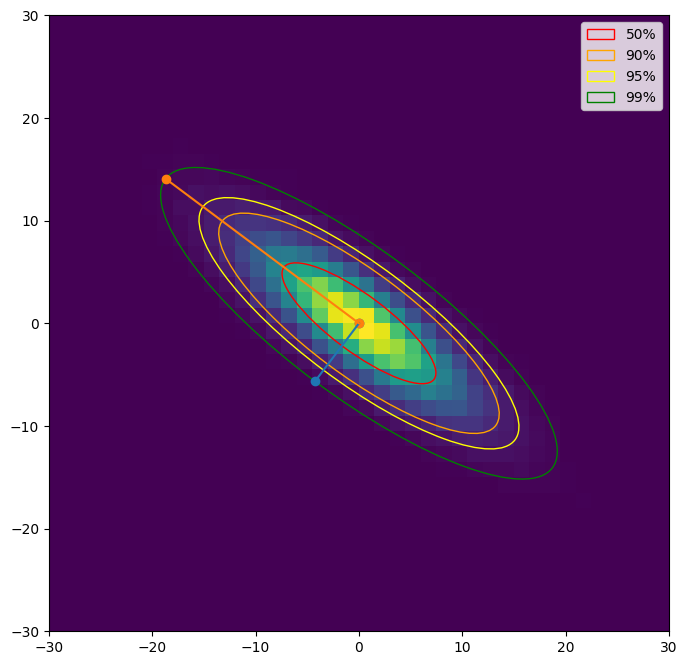

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2


mean = np.zeros(2)
cov = np.array([[40, -26], [-26, 25]])

def plt_ell(ax, mean, cov, conf, dr, **kwargs):

    eival, eivect = np.linalg.eigh(cov)

    std_dev = np.sqrt(eival)

    angle = np.degrees(np.arctan2(*eivect[:, 0][::-1]))

    chi_squared_value = chi2.ppf(conf, 2)
    chival = np.sqrt(chi2.ppf(conf, 2))
    width = 2 * chival * std_dev[0]
    height = 2 * chival * std_dev[1]

    ellipse = plt.matplotlib.patches.Ellipse(mean, width, height, angle=angle, fill=False, **kwargs)

    ax.add_patch(ellipse)

    if (dr==1):
      x1 = [0, eivect[0, 0]*width/2]
      y1 = [0, eivect[0, 1]*width/2]
      plt.scatter(x1, y1)
      plt.plot(x1, y1)
      x2 = [0, eivect[1, 0]*height/2]
      y2 = [0, eivect[1, 1]*height/2]
      plt.scatter(x2, y2)
      plt.plot(x2, y2)



fig, ax = plt.subplots(figsize=(8, 8))

plt.plot(figsize=(8, 8))
L = np.linalg.cholesky(cov)
samples = L @ np.random.randn(2, 100000)
plt.hist2d(*samples, bins=40, range = [[-30, 30], [-30, 30]])

#s = [0,(eivect[0,0]*(-1))*width/2]
#t = [0, eivect[0, 1]*width/2]
#plt.scatter(s, t, s = 10)

plt_ell(ax, mean, cov, 0.50, color='red', label='50%', dr = 0)
plt_ell(ax, mean, cov, 0.90, color='orange', label='90%', dr = 0)
plt_ell(ax, mean, cov, 0.95, color='yellow', label='95%', dr = 0)
plt_ell(ax, mean, cov, 0.99, color='green', label='99%', dr = 1)

ax.legend()

plt.show()
